<a href="https://colab.research.google.com/github/maryammoayedi/Artificial-intelligence-/blob/main/Dimensionality_reduction_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import *
from sklearn.manifold import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
data=load_digits()
print(data.feature_names, data.target_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'] [0 1 2 3 4 5 6 7 8 9]


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


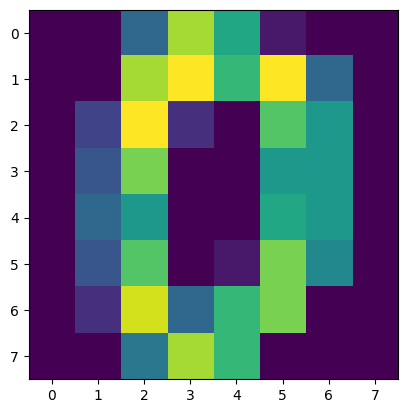

In [ ]:
print(data.data)
print(data.data.shape)
plt.imshow(data.images[0])

In [ ]:
print(data.target)


[0 1 2 ... 8 9 8]


(1797, 2)


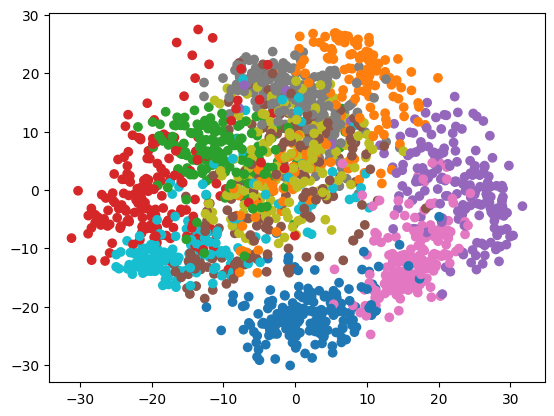

In [ ]:
pca=PCA(2)
tr=pca.fit_transform(data.data)
print(tr.shape)
plt.scatter(tr[:,0], tr[:,1], c=data.target, cmap='tab10')

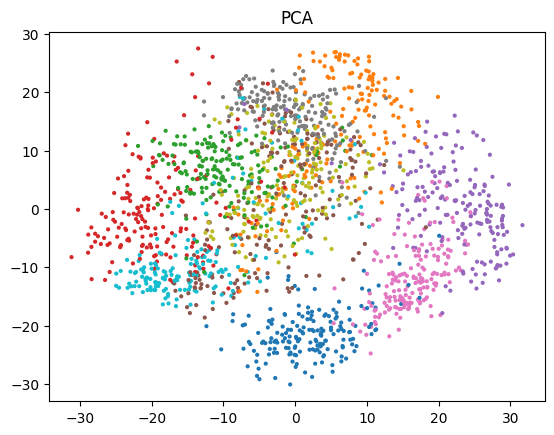

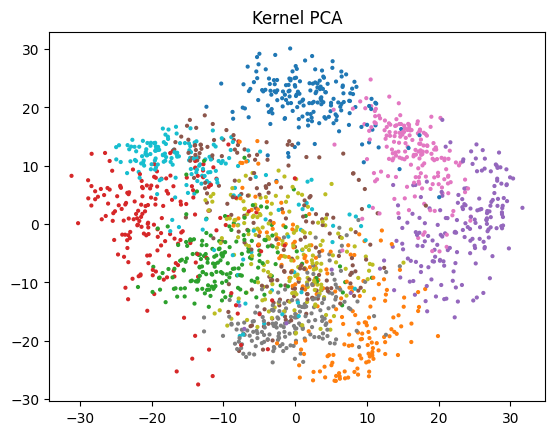

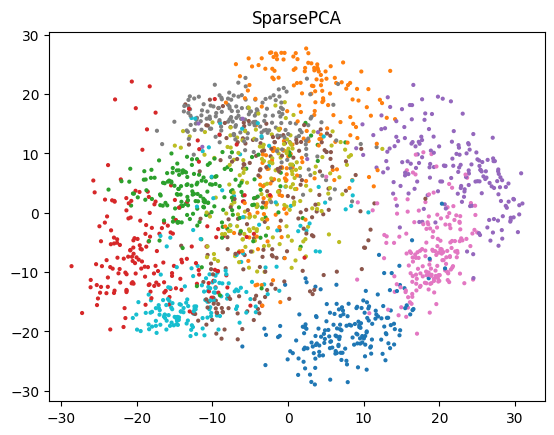

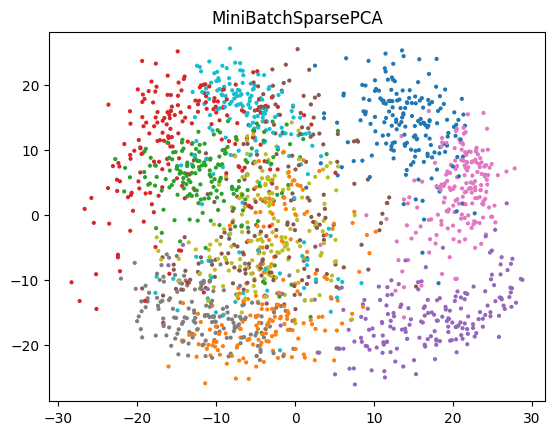

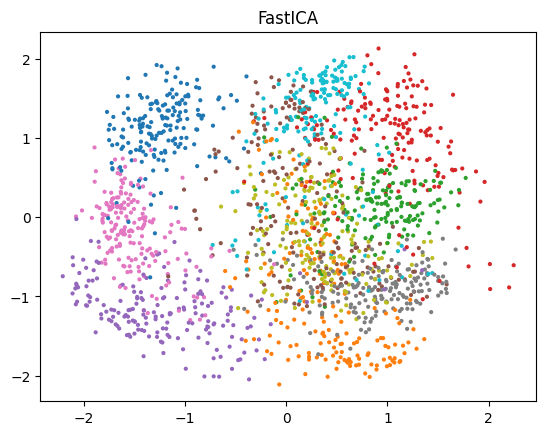

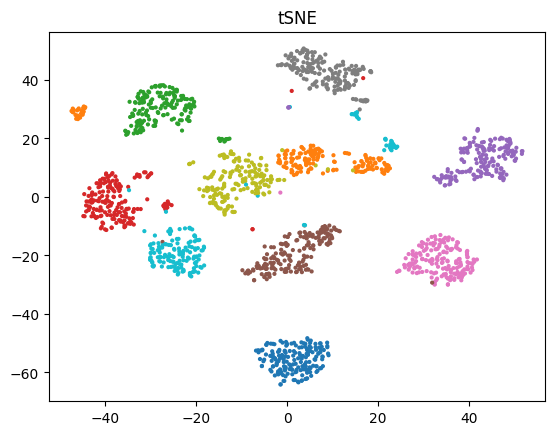

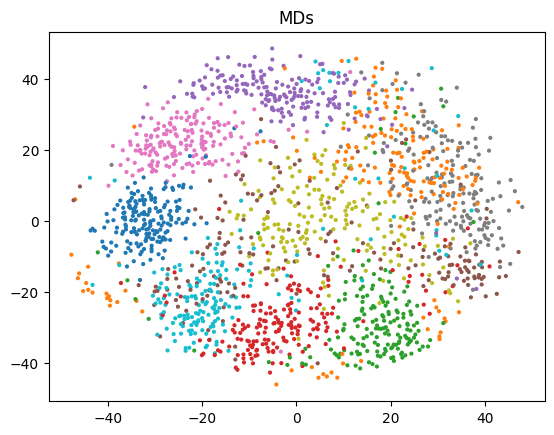

In [ ]:

def visualize_dim_red(name, alg, data):
  al=alg(2)
  tr=al.fit_transform(data.data)
  plt.scatter(tr[:,0], tr[:,1], c=data.target, cmap='tab10', s=4)
  plt.title(name)
  plt.show()

dim_red_algs={"PCA":PCA, "Kernel PCA": KernelPCA, "SparsePCA": SparsePCA, "MiniBatchSparsePCA":MiniBatchSparsePCA, "FastICA":FastICA, "tSNE":TSNE, "MDs":MDS}
for name, alg in dim_red_algs.items():
  visualize_dim_red(name, alg, data)

In [40]:
X_train, X_test, Y_train, Y_test=train_test_split(data.data, data.target, test_size=0.25)
print(X_train.shape, X_test.shape)
cls_algs={"SVC":SVC, "RandomForestClassifier":RandomForestClassifier, "AdaBoostClassifier": AdaBoostClassifier}
al=RandomForestClassifier()
al.fit(X_train, Y_train)
Y_pred=al.predict(X_test)
print(Y_pred)
print(Y_test)


(1347, 64) (450, 64)
[4 5 5 6 1 2 1 1 5 3 6 5 2 6 7 1 8 7 7 9 3 1 3 5 4 7 4 6 0 8 6 6 1 7 5 9 4
 2 3 4 4 6 3 8 1 2 2 3 8 3 9 1 6 6 1 6 3 8 0 2 4 5 8 3 7 7 3 4 0 8 1 9 3 3
 1 1 9 0 8 8 5 7 5 2 7 2 0 0 6 1 6 5 3 5 7 4 7 1 1 9 4 6 1 7 5 7 7 1 1 0 5
 2 1 2 5 2 5 2 0 0 5 3 0 0 0 1 2 4 1 4 2 7 1 0 4 1 6 4 0 5 1 7 3 6 7 5 8 4
 3 9 8 0 7 4 5 9 6 3 0 7 9 4 6 0 8 3 0 9 3 5 3 1 6 7 3 4 9 8 5 3 4 7 2 5 8
 2 9 7 2 0 5 1 7 6 5 7 4 5 3 0 1 1 5 9 7 2 0 2 4 2 2 7 4 0 2 6 8 6 8 7 4 0
 4 5 1 3 8 6 8 3 2 9 7 3 5 8 8 5 5 8 0 9 2 3 3 4 9 5 3 1 1 4 2 9 6 1 8 9 5
 1 7 5 3 2 1 3 0 1 4 8 3 1 1 5 9 9 6 3 3 7 4 5 7 9 3 7 1 6 0 1 1 7 3 5 4 3
 5 3 4 9 9 4 4 0 3 6 7 1 0 0 1 2 3 1 3 6 9 5 5 9 2 7 4 0 6 2 3 0 4 6 0 3 2
 7 4 9 8 2 8 0 9 4 1 1 7 2 3 4 1 4 0 2 0 9 1 4 7 9 9 6 0 9 0 0 1 5 0 9 0 7
 9 7 6 3 5 8 3 3 8 8 6 9 6 2 6 5 7 9 0 1 4 0 2 1 9 4 5 4 3 3 6 1 7 9 2 6 6
 8 5 4 9 0 4 5 4 6 7 7 0 0 7 5 9 3 2 6 8 3 1 6 0 7 2 7 1 2 6 7 5 4 5 0 5 2
 2 0 3 2 8 4]
[4 5 5 6 1 2 1 1 5 3 6 5 2 6 7 1 8 7 7 9 3 1 3 5 4 7 4 6 0 8 6 6 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


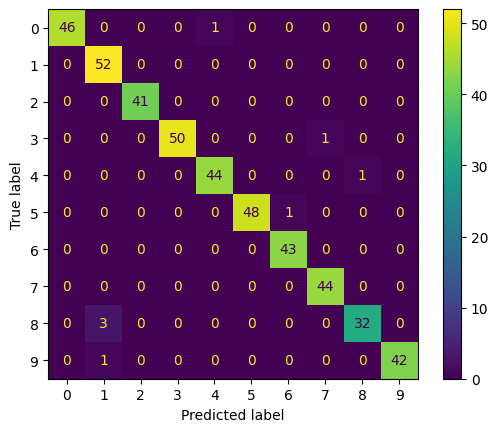

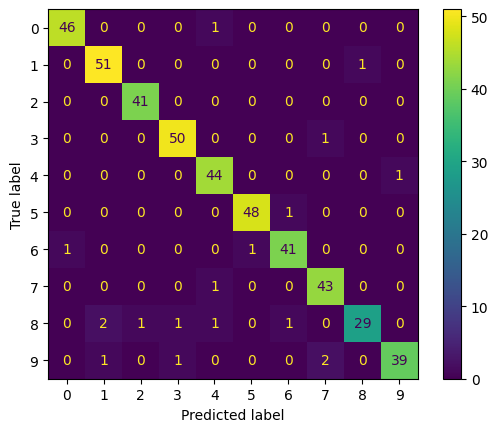

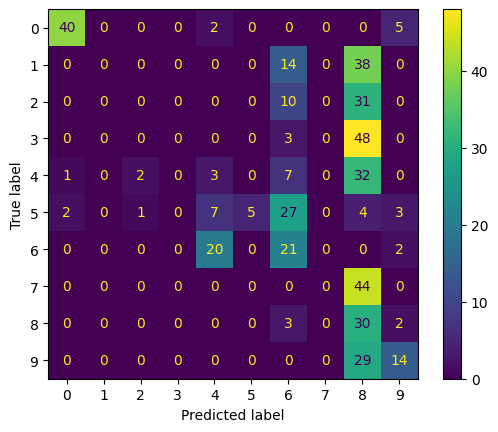

In [41]:
cls_algs={"SVC":SVC, "RandomForestClassifier":RandomForestClassifier, "AdaBoostClassifier": AdaBoostClassifier}

for name, alg in cls_algs.items():
  al=alg()
  al.fit(X_train, Y_train)
  ConfusionMatrixDisplay.from_estimator(al, X_test, Y_test)
